In [1]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

base_donnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv")
del base_donnees["sunset_hhmm"]
del base_donnees["sunrise_hhmm"]


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Temp\ipykernel_2684\2832764110.py:7: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  base_donnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv")



In [2]:
base_donnees.dtypes

date                          object
max_temperature              float64
avg_hourly_temperature       float64
avg_temperature              float64
min_temperature              float64
                              ...   
min_cloud_cover_8            float64
max_cloud_cover_10           float64
avg_hourly_cloud_cover_10    float64
avg_cloud_cover_10           float64
min_cloud_cover_10           float64
Length: 70, dtype: object

<Axes: >

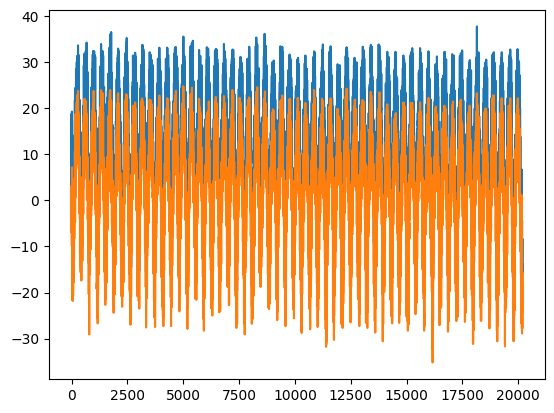

In [3]:
base_donnees['max_temperature'].plot()
base_donnees['min_temperature'].plot()

In [4]:
data = base_donnees[['date','max_temperature']]
data.dropna(inplace=True)
data.columns = ['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Temp\ipykernel_2684\4255116482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2025-04-06,8.1
1,2025-04-05,7.4
2,2025-04-04,10.6
3,2025-04-03,18.8
4,2025-04-02,1.4


In [5]:
import os

os.makedirs("lightning_logs/version_0", exist_ok=True)

model = NeuralProphet()
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.995% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\P

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (158) is too small than the required number                     for the learning rate finder (257). The results might not be optimal.

Finding best initial lr:   0%|          | 0/257 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 128. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr:  58%|█████▊    | 150/257 [00:01<00:01, 97.08it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 89. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)

Training: |          | 0/? [39:12<?, ?it/s, v_num=2, train_loss=0.010, reg_loss=0.000, MAE=3.970, RMSE=5.020, Loss=0.010, RegLoss=0.000]  


,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.314189,0.0,31.212538,38.887573,0.313736,0.0,0
1,0.026026,0.0,6.352666,8.065188,0.025990,0.0,1
2,0.010916,0.0,4.195757,5.330039,0.010924,0.0,2
3,0.010668,0.0,4.132578,5.240768,0.010665,0.0,3
4,0.010535,0.0,4.093159,5.195008,0.010533,0.0,4
...,...,...,...,...,...,...,...
995,0.010007,0.0,3.967826,5.024053,0.010009,0.0,995
996,0.010007,0.0,3.965632,5.024706,0.010007,0.0,996
997,0.010003,0.0,3.966379,5.024658,0.010004,0.0,997
998,0.010007,0.0,3.964277,5.024642,0.010006,0.0,998
